In [ ]:
!pip install tensorflow

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Load the latest version
import kagglehub
#from kagglehub.clients.kaggle_dataset_adapter import KaggleDatasetAdapter # Removed

df = kagglehub.load_dataset(
  adapter=kagglehub.KaggleDatasetAdapter.PANDAS, # Corrected reference
  dataset_id="uciml/red-wine-quality-cortez-et-al-2009",
  file_path="winequality-red.csv", # Changed file_path to a file in the correct dataset
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

/tmp/ipython-input-8-1682620601.py:5: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
import tensorflow as tf

# 75% of the data is selected
train_df = df.sample(frac=0.75, random_state=4)

# it drops the training data
# from the original dataframe
val_df = df.drop(train_df.index)

In [ ]:
# calling to (0,1) range
max_val = train_df.max(axis= 0)
min_val = train_df.min(axis= 0)

range = max_val - min_val
train_df = (train_df - min_val)/(range)

val_df = (val_df- min_val)/range

In [ ]:
# now let's separate the targets and labels
X_train = train_df.drop('quality',axis=1)
X_val = val_df.drop('quality',axis=1)
y_train = train_df['quality']
y_val = val_df['quality']

# We'll need to pass the shape
# of features/inputs as an argument
# in our model, so let's define a variable
# to save it.
input_shape = [X_train.shape[1]]

input_shape

[11]

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 1, input_shape = (input_shape[0], ))
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12 (48.00 B)

 Trainable params: 12 (48.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#The input_shape needs to be passed to the first Dense layer as a tuple
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu',
                        input_shape=(input_shape[0],)), # Pass input_shape as a tuple
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,993 (19.50 KB)

 Trainable params: 4,993 (19.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

# adam optimizer works pretty well for
# all kinds of problems and is a good starting point
model.compile(optimizer='adam',

			# MAE error is good for
			# numerical predictions
			loss='mae')

In [ ]:

losses = model.fit(X_train, y_train,

                   validation_data=(X_val, y_val),

                   # it will use 'batch_size' number
                   # of examples per example
                   batch_size=256,
                   epochs=15,  # total epoch

                   )

Epoch 1/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.4168 - val_loss: 0.3022
Epoch 2/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2670 - val_loss: 0.1650
Epoch 3/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1509 - val_loss: 0.1328
Epoch 4/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1441 - val_loss: 0.1488
Epoch 5/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1524 - val_loss: 0.1299
Epoch 6/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1305 - val_loss: 0.1186
Epoch 7/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1229 - val_loss: 0.1186
Epoch 8/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1199 - val_loss: 0.1103
Epoch 9/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1143 - val_loss: 0.1115
Epoch 10/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1130 - val_loss: 0.1082
Epoch 11/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1112 - val_loss: 0.1065
Epoch 12/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1059 - val_loss: 0.1048
E

In [ ]:

# this will pass the first 3 rows of features
# of our data as input to make predictions
model.predict(X_val.iloc[0:3, :])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


array([[0.43933102],
       [0.5578389 ],
       [0.44480982]], dtype=float32)

In [ ]:

y_val.iloc[0:3]

,quality
0,0.4
9,0.4
12,0.4


<Axes: >

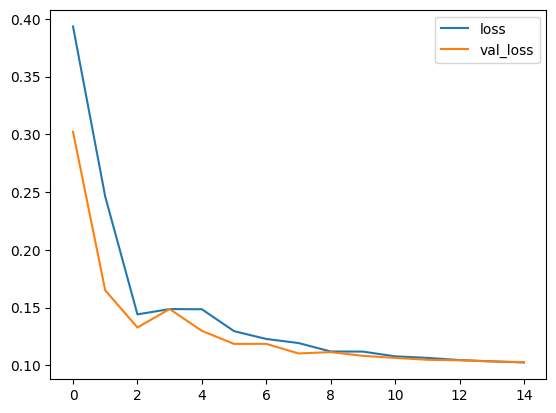

In [ ]:

loss_df = pd.DataFrame(losses.history)

# history stores the loss/val
# loss in each epoch

# loss_df is a dataframe which
# contains the losses so we can
# plot it to visualize our model training
loss_df.loc[:,['loss','val_loss']].plot()